In [1]:
!chmod -R a+rwx .

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Spotify_data.xlsx')

In [4]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [5]:
len(df)

520

# Preprocessing - Cleaning and preparing for visualization

In [33]:
df.isna().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

### Dropping preffered_premium_plan because column is irrelevant for further analysis and it has a lot of empty rows

In [34]:
df = df.drop('preffered_premium_plan', axis=1)
df = df.dropna()
len(df)

344

In [35]:
df.columns

Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
       'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
       'music_recc_rating', 'pod_lis_frequency', 'fav_pod_genre',
       'preffered_pod_format', 'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')

In [42]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
7,20-35,Female,Less than 6 months,Smartphone,Free (ad-supported),No,Music,Melody,Night,Social gatherings or parties,leisure time,recommendations,5,Several times a week,Lifestyle and Health,Conversational,Both,Longer,Satisfied
8,20-35,Female,Less than 6 months,Smartphone,Free (ad-supported),Yes,Music,Melody,Afternoon,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time","Playlists, Radio",4,Rarely,Comedy,Story telling,Well known individuals,Shorter,Satisfied
10,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Music,Melody,Afternoon,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time",Playlists,3,Several times a week,Lifestyle and Health,Story telling,Both,Both,Satisfied


# Most of the data contains of Female users.

Text(0, 0.5, 'Count')

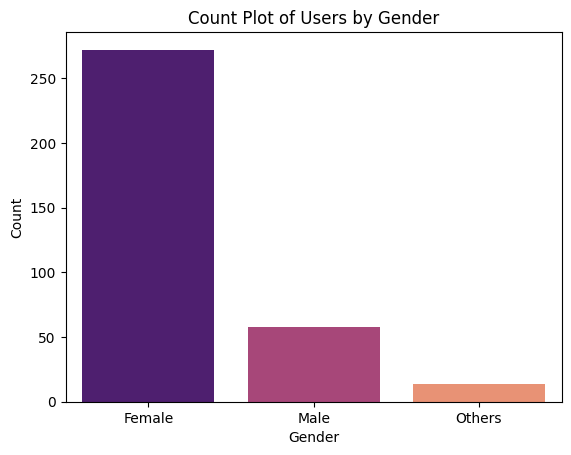

In [43]:
sns.countplot(data=df, x='Gender', palette='magma', hue='Gender')
plt.title('Count Plot of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

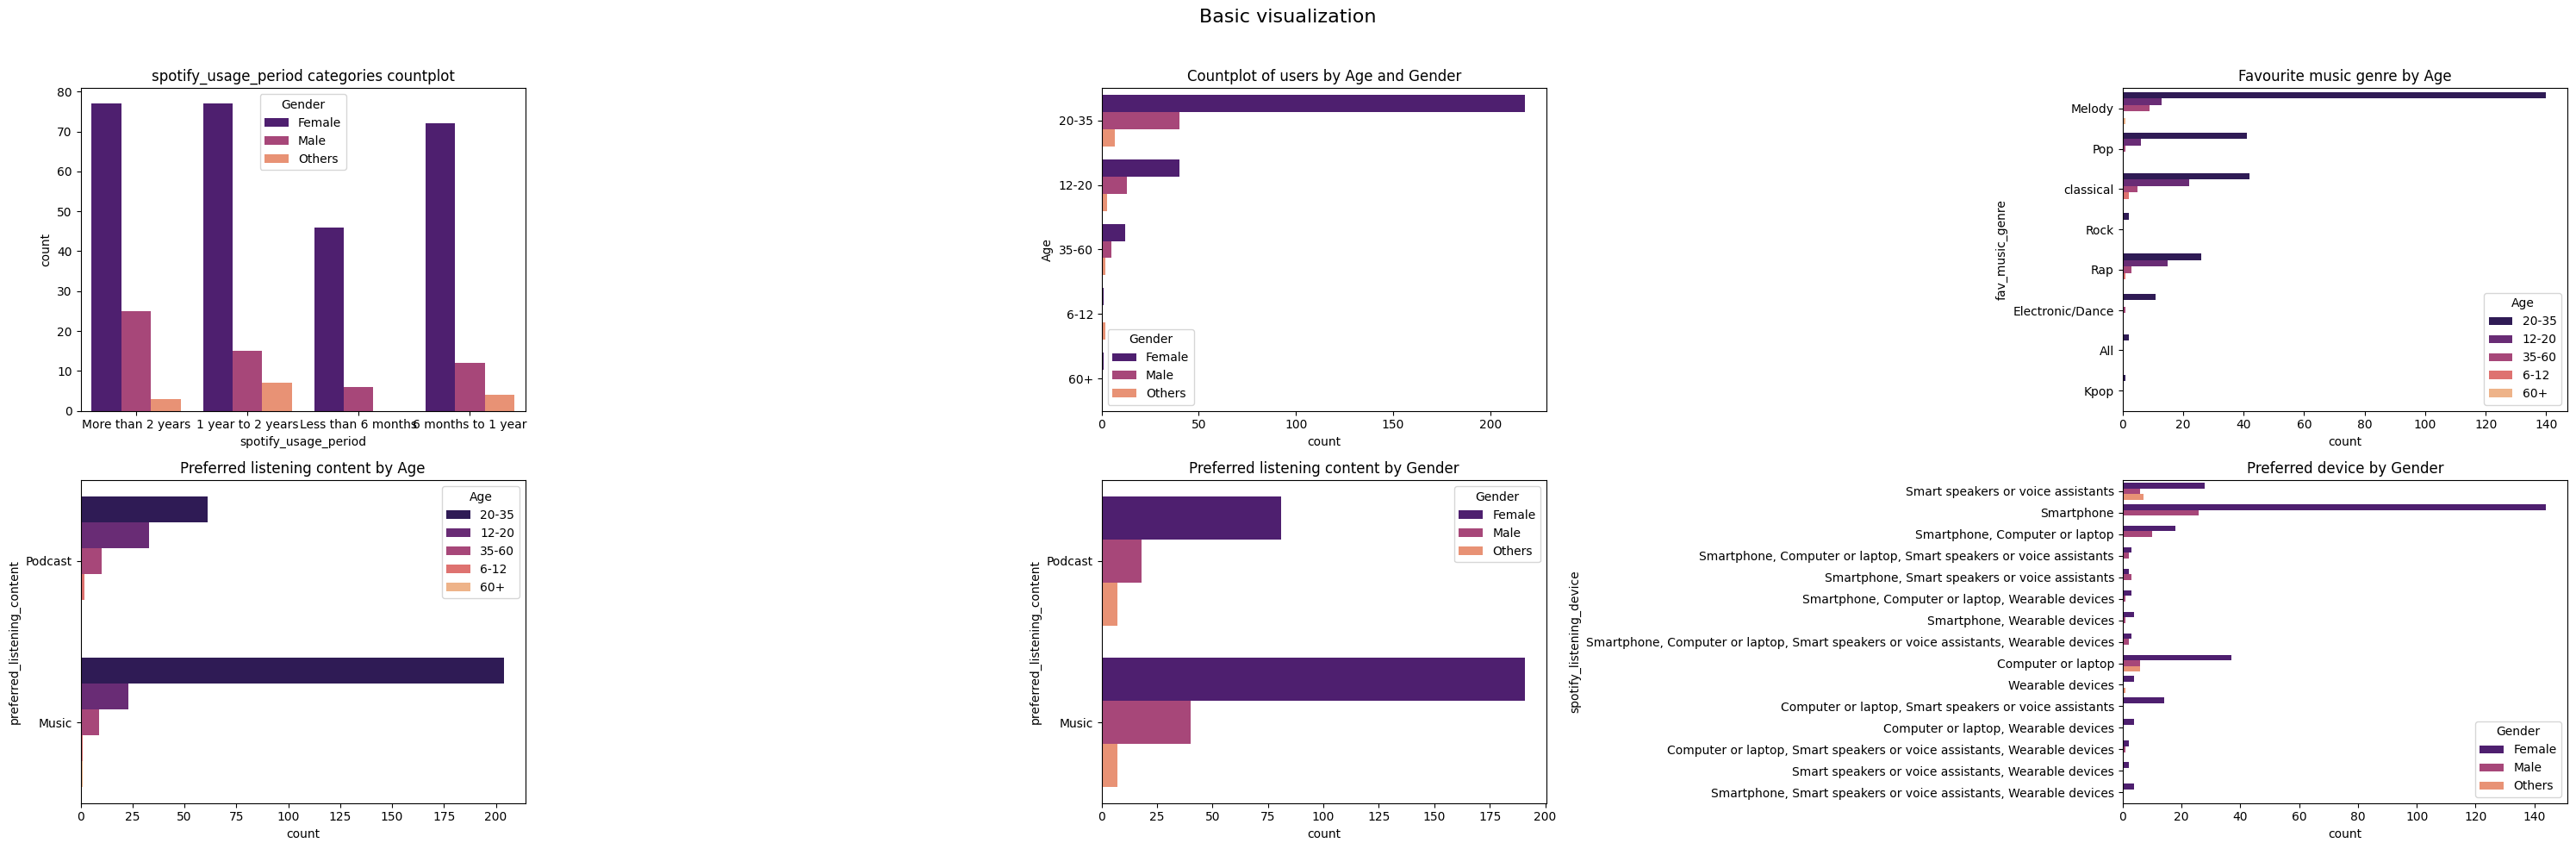

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig1, axes = plt.subplots(2, 3, figsize=(30, 10))
fig1.suptitle('Basic visualization', fontsize=16)

# Education Stacked Bar Plot
g = sns.countplot(x='spotify_usage_period', data=df, hue='Gender', ax=axes[0, 0], palette='magma')
g.set_title('spotify_usage_period categories countplot')

# Housing Stacked Bar Plot
g1 = sns.countplot(y='Age', data=df, hue='Gender', ax=axes[0, 1], palette='magma')
g1.set_title('Countplot of users by Age and Gender')

# Marital Stacked Bar Plot
g2 = sns.countplot(y='fav_music_genre', data=df, hue='Age', ax=axes[0, 2], palette='magma')
g2.set_title('Favourite music genre by Age')

# Age Box Plot
g33 = sns.countplot(y='preferred_listening_content', hue='Age', data=df, ax=axes[1, 0], palette='magma')
g33.set_title('Preferred listening content by Age')

# Loan Stacked Bar Plot
g3 = sns.countplot(y='preferred_listening_content', hue='Gender', data=df, ax=axes[1, 1], palette='magma')
g3.set_title('Preferred listening content by Gender')

# Balance Box Plot
g5 = sns.countplot(y='spotify_listening_device', data=df, hue='Gender', ax=axes[1, 2], palette='magma')
g5.set_title('Preferred device by Gender')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()